# Zadanie 13.5

Policz pozostałe metryki dla tego modelu, zrób wizualizacyjną ocenę i następnie porównaj ostatni model z pierwszym, który stworzyliśmy.

##### Przygotowanie danych

In [1]:
import pandas as pd
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp']) / bike_data['temp']
bike_data.drop(['atemp'], axis = 1, inplace = True)

numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


##### Pierwszy model z modułu

In [2]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

##### Wizualizacja i metryki

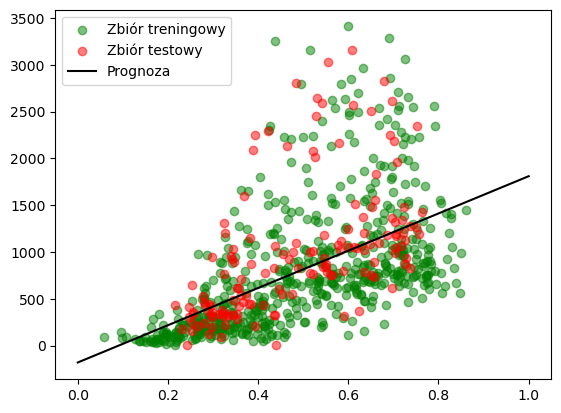

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')

plt.show()

In [4]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [5]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')


Train R^2: 0.30617863454631344
Train MAE: 404.8339599752615
Test MAE: 391.02879410802956
Train MAPE: 0.9668581511778533
Test MAPE: 2.9864925318560496
Train MSE: 317745.94124252343
Test MSE: 397066.9447179113
Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


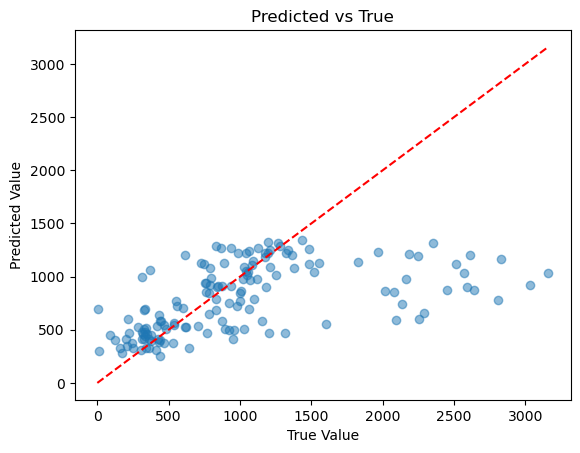

In [6]:
# Porównanie prognoz i wartości rzeczywistych
plt.scatter(y_test, y_predict_test, alpha=0.5)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs True')
plt.show()

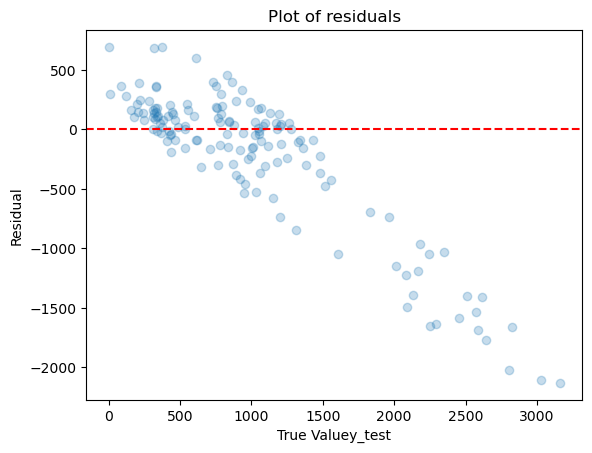

In [7]:
# Wykres reszt
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

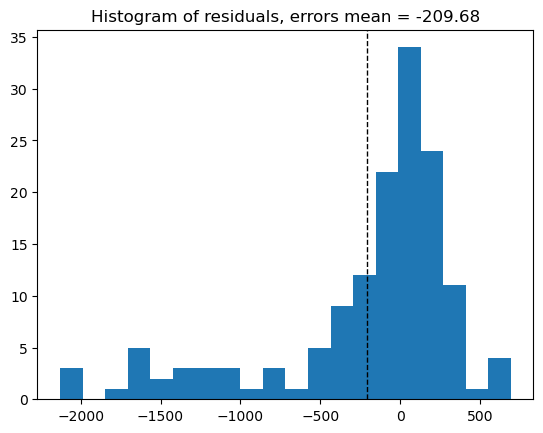

In [8]:
# Histogram reszt
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

##### Model końcowy modułu

In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

# Ignorowanie ostrzeżeń
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 



In [10]:
train_predictions = final_polynomial_regression_model.predict(X_train)
test_predictions = final_polynomial_regression_model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, train_predictions)}')

from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, train_predictions)}')
print(f'Test MAE: {mean_absolute_error(y_test, test_predictions)}')

from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, train_predictions)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, test_predictions)}')

from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, train_predictions)}')
print(f'Test MSE: {mean_squared_error(y_test, test_predictions)}')

from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, train_predictions))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, test_predictions))}')

Train R^2: 0.701073802580253
Train MAE: 261.298427600573
Test MAE: 348.58519388349225
Train MAPE: 0.7443187878605138
Test MAPE: 0.8593319707168832
Train MSE: 136897.7530680065
Test MSE: 234195.93155658216
Train RMSE: 369.99696359295507
Test RMSE: 483.9379418443879


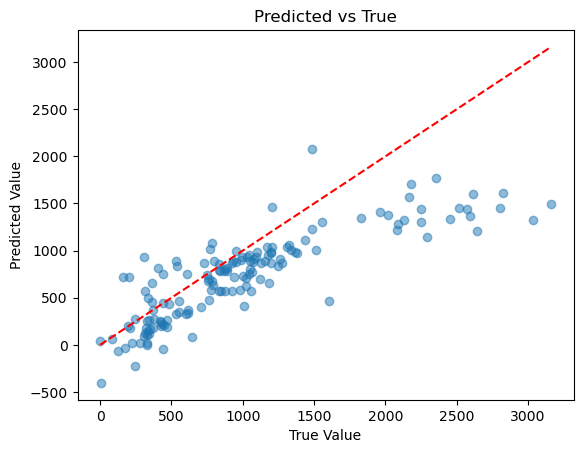

In [12]:
# Porównanie prognoz i wartości rzeczywistych
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs True')
plt.show()

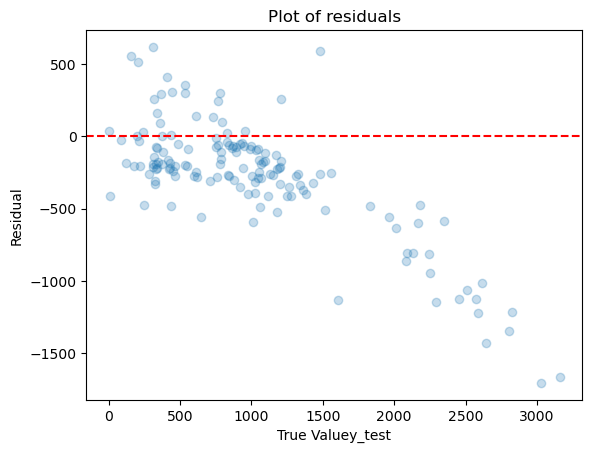

In [13]:
# Wykres reszt
errors = test_predictions - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

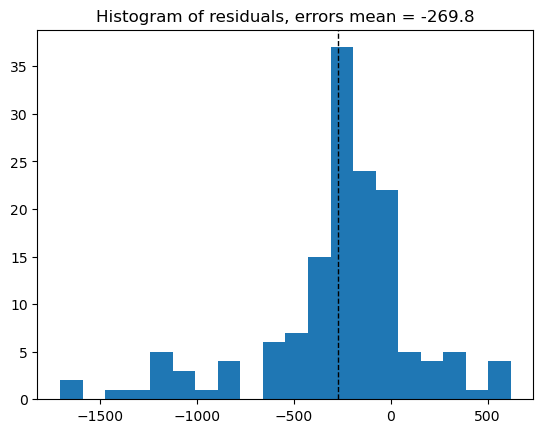

In [14]:
# Histogram reszt
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

##### Porównanie na jednym wykresie

Text(0, 0.5, 'Predicted Value')

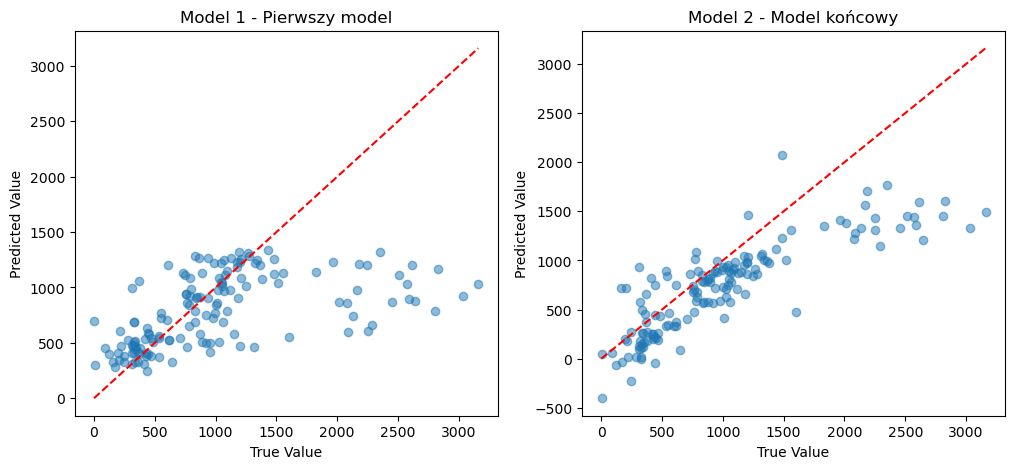

In [15]:
import matplotlib.pyplot as plt

# Przygotowanie figurek dla porównania dwóch modeli obok siebie
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Tytuły dla obu wykresów
ax[0].set_title("Model 1 - Pierwszy model")
ax[1].set_title("Model 2 - Model końcowy")

# Wstawianie wyników modeli
ax[0].scatter(y_test, y_predict_test, alpha=0.5)
ax[0].plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
ax[0].set_xlabel('True Value')
ax[0].set_ylabel('Predicted Value')

ax[1].scatter(y_test, test_predictions, alpha=0.5)
ax[1].plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
ax[1].set_xlabel('True Value')
ax[1].set_ylabel('Predicted Value')


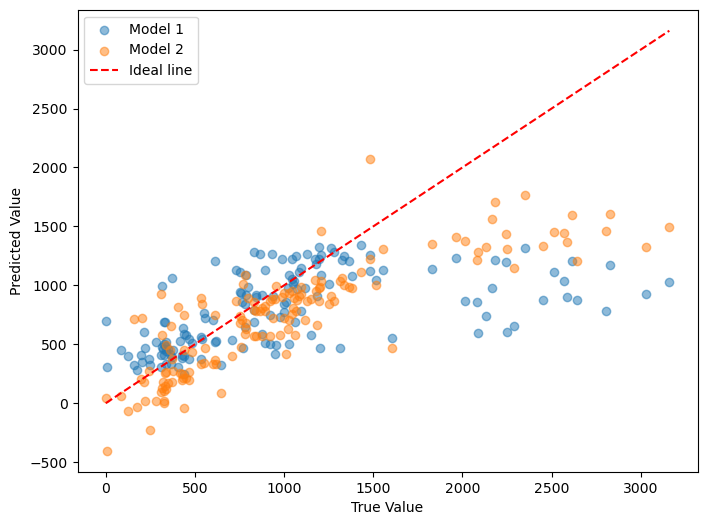

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_test, alpha=0.5, label='Model 1')
plt.scatter(y_test, test_predictions, alpha=0.5, label='Model 2')
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--', label='Ideal line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()
